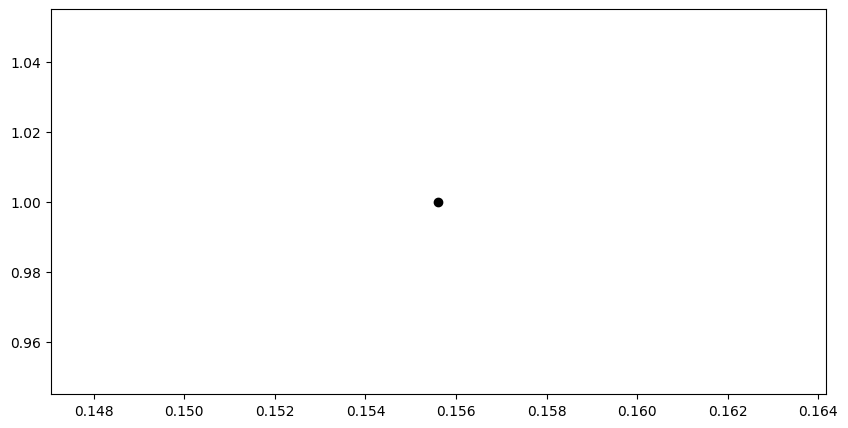

In [24]:
!pip install kneed
from kneed import KneeLocator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import sklearn.utils
b=MinMaxScaler()
data=pd.read_csv('/content/data.csv',encoding="ISO-8859-1")
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Data preprocessing
#Imputation nothelpful here, thus removing the empty records
data.dropna(axis=0,subset='CustomerID',inplace=True)
#removing duplicate records
data.drop_duplicates(inplace = True)
data['Total']=data['Quantity']*data['UnitPrice']
d_use=data.groupby(by=['CustomerID'], as_index=False)['Total'].sum()
d_use=d_use.set_index('CustomerID')
d=data.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
d=d.rename(columns={'InvoiceDate':'No. of products'})
d=d.set_index('CustomerID')
d_use=pd.concat([d_use,d],axis=1)
x=b.fit_transform(d_use)
df_products = (data['Description'].unique())
d={}
lew=[]
co=['RED','YELLOW','BLUE','BLACK','WHITE','GREEN','ORANGE']
for item in df_products:
    il=item.split()
    for color in co:
     if color in il:
       il.remove(color)
    k= ' '.join(il[-2:])
    d[item]=k
for item in data['Description']:
    lew.append(d[item])
data['Categorynew']=lew
#Finding best cluster no. using elbow method
data=data.set_index('CustomerID')
data=data.drop('InvoiceNo',axis=1)
data=data.drop('Description',axis=1)
data=data.drop('StockCode',axis=1)
data=data.drop('Country',axis=1)
data=data.drop('InvoiceDate',axis=1)
df_encoded = pd.get_dummies(data,columns=['Categorynew'],dtype=int)
#Type 1 of analysis-using 2 variate data of no. of times customer buys and the value of product bought
#first normal k-means is used using ecss score, then dbscan is used
wcss=[]
for i in range(1,11):
   km=KMeans(n_clusters=i, random_state=0, init="k-means++")
   km.fit(x)
   wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)
#Thus optimal number of clusters is 4
km=KMeans(n_clusters=4, random_state=0, init='k-means++')
y=km.fit_predict(x)
plt.scatter(x[y==0,0],x[y==0,1],s=10,c='red',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=10,c='blue',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=10,c='green',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=10,c='yellow',label='cluster 4')
#dbscan
#eps=0.348954 becomes too small
db = DBSCAN(eps=0.348954, min_samples=2).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.figure(figsize=(10,5))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = x[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
xy = x[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#eps=0.348955 becomes too large
db = DBSCAN(eps=0.348955, min_samples=2).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.figure(figsize=(10,5))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = x[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
xy = x[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#type-2 using multivariate data to analyse the type of product bought by the customers
#using tsne to convert to 2 variables
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(df_encoded)
xnew=b.fit_transform(tsne_obj)
wcss=[]
for i in range(1,11):
   km=KMeans(n_clusters=i, random_state=0, init="k-means++")
   km.fit(xnew)
   wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)
#optimal no. of clusters here also is 4
km=KMeans(n_clusters=4, random_state=0, init='k-means++')
y=km.fit_predict(xnew)
plt.scatter(x[y==0,0],x[y==0,1],s=10,c='red',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=10,c='blue',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=10,c='green',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=10,c='yellow',label='cluster 4')